# Homework3

The graph of Europe G* = ⟨𝑉, 𝐸⟩ is defined as follows: each vertex 𝑣 ∈ 𝑉 is a Europe country; two vertices are adjacent ({𝑢, 𝑣} ∈ 𝐸) if the corresponding countries share a land border. Let G be a maximum connected component of G*.

## Creating class for Edges

That needs for comfortable work with data

In [1]:
import os
import string

class Edge:
    def __init__(self,first_country,second_country,distance):
        self.first_vert = first_country
        self.second_vert = second_country
        self.dist = distance

# Download data and creating dataset

In [2]:
with open('europe.txt') as f:
    data = [line.rstrip('\n') for line in f]
    
adjacency_list = []
kost = []
for name in data:
    f_c = name.find(',')
    s_c = name.rfind(',')
    first_country = name[:f_c]
    second_country = name[f_c+2:s_c]
    distance = name[s_c+2:]
    kost.append([first_country,second_country,{'weight':distance}])
    adjacency_list.append(Edge(first_country,second_country,distance))

# Creating graph
Also importing library for comfortable work with data

In [3]:
import networkx as nx

G = nx.Graph()
G.add_edges_from(kost)

## 1-a Task

#### Task description: Prove that G* is planar by drawing it on a plane without an intersection of edges.

In graph theory, a planar graph is a graph that can be embedded in the plane, i.e., it can be drawn on the plane in such a way that its edges intersect only at their endpoints. In other words, it can be drawn in such a way that no edges cross each other. Such a drawing is called a plane graph or planar embedding of the graph. A plane graph can be defined as a planar graph with a mapping from every node to a point on a plane, and from every edge to a plane curve on that plane, such that the extreme points of each curve are the points mapped from its end nodes, and all curves are disjoint except on their extreme point

#### Example for creating planar graph from non-planar:

[![](https://github.com/vaskers5/D_M_homework_Graphs/blob/main/pictures/planar.png?raw=true)
![](https://media.giphy.com/media/vFKqnCdLPNOKc/giphy.gif)

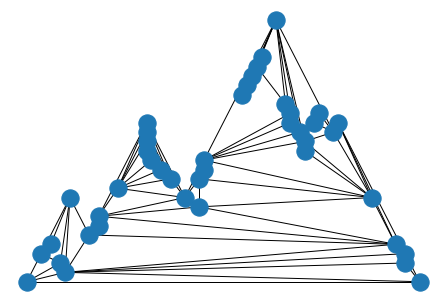

In [4]:
nx.draw_planar(G)

In [5]:
from pyvis.network import Network

net = Network("1080px", "1080px",notebook = True)
net.from_nx(G)
#net.show("NET.html")

## 1-b Task

#### Task description: Find |𝑉|, |𝐸|, 𝛿(G), Δ(G), rad(G), diam(G), girth(G), center(G), 𝜅(G), 𝜆(G).

##### Definitions:

Degree - In graph theory, the degree (or valency) of a vertex of a graph is the number of edges that are incident to the vertex.

The eccentricity e(v) of a vertex v is the greatest distance between v and any other vertex.

1)𝛿(G) - max degree of nodes.

2)Δ(G) - min degree of nodes.

3)The radius r of a graph is the minimum eccentricity of any vertex

4)The diameter d of a graph is the maximum eccentricity of any vertex in the graph

5)Girth(G) the minimum cycle of graph

6)A central vertex in a graph of radius r is one whose eccentricity is r—that is, a vertex that achieves the radius or, equivalently, a vertex v such that e(v)=r.

In [6]:
print("|𝑉| -",G.number_of_nodes())
print("|𝐸| -",G.number_of_edges())
degree_sequence = sorted([d for n, d in G.degree()], reverse = True)
print("𝛿(G) -",max(degree_sequence))
print("Δ(G) -",min(degree_sequence))
print("rad(G) -",nx.algorithms.distance_measures.radius(G))
print("diam(G) -",nx.algorithms.distance_measures.diameter(G))
cycles = nx.minimum_cycle_basis(G)
print("girth(G) -",len(min(cycles)),":"," ".join(min(cycles)))
print("center(G) -"," ".join(nx.algorithms.distance_measures.center(G)))
print("𝜅(G) -",nx.algorithms.connectivity.node_connectivity(G))
print("𝜆(G) -",nx.algorithms.connectivity.edge_connectivity(G))

|𝑉| - 43
|𝐸| - 86
𝛿(G) - 9
Δ(G) - 1
rad(G) - 4
diam(G) - 8
girth(G) - 3 : Albania Greece Northern Macedonia
center(G) - Poland
𝜅(G) - 1
𝜆(G) - 1


## 1-c Task
##### Task description: Find the minimum vertex coloring 𝑍: 𝑉 → N of G.
##### Definitions:
A vertex coloring is an assignment of colors to each vertex of a graph such that no edge connects two identically colored vertices.


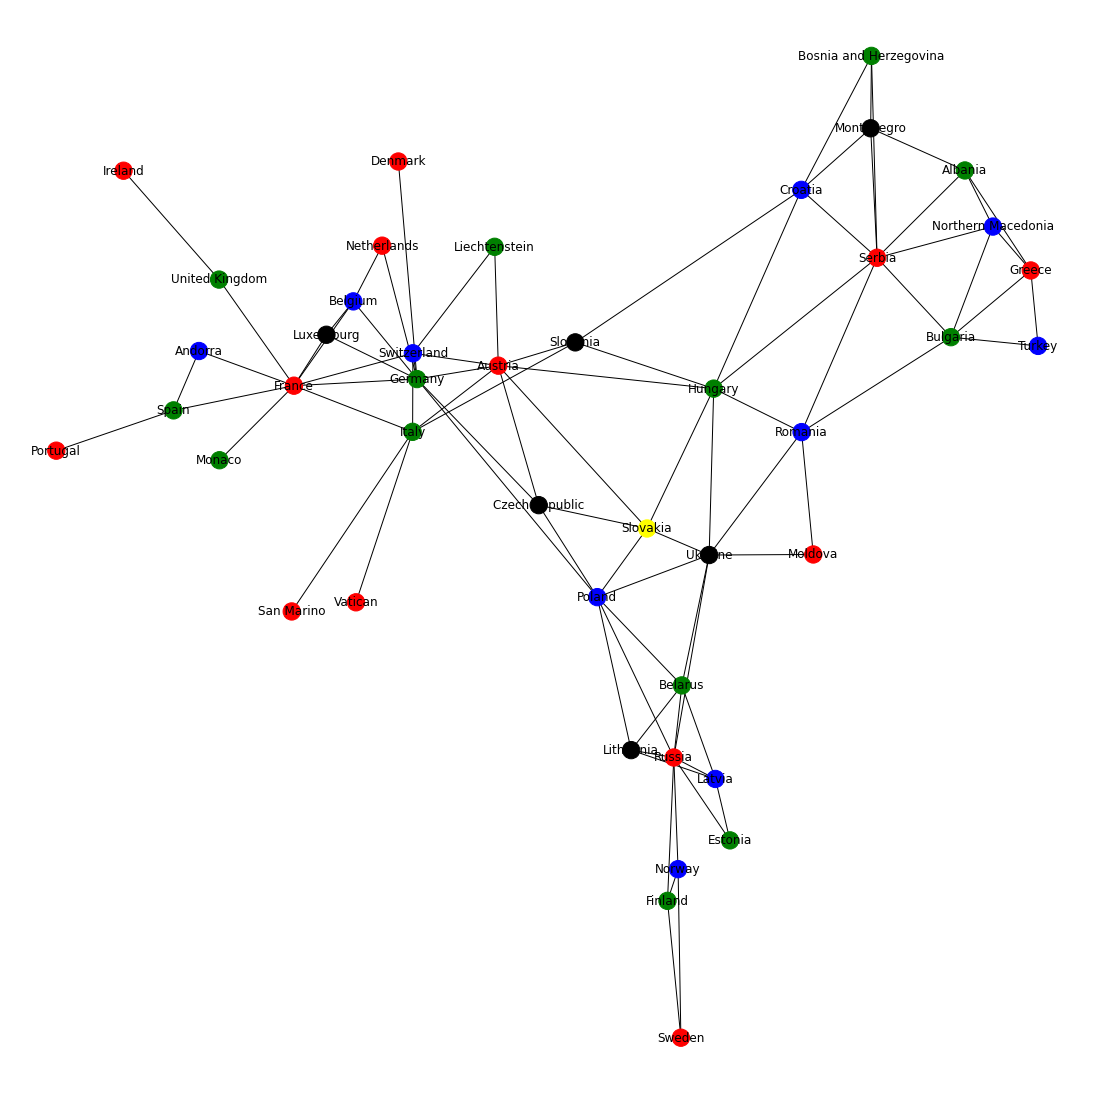

In [7]:
colors = nx.algorithms.coloring.greedy_color(G)

import matplotlib.pyplot as plt
color_map = []

for node in G:
    if colors[node]==0:
        color_map.append('red')
    elif colors[node]==1: 
        color_map.append('green')
    elif colors[node]==2: 
        color_map.append('blue')
    elif colors[node]==3: 
        color_map.append('black')
    elif colors[node]==4: 
        color_map.append('yellow')


plt.figure(3,figsize=(15,15))
pos=nx.spring_layout(G)
nx.draw(G,pos = pos,node_color = color_map, with_labels = True)
plt.show()

## 1-d Task
##### Task description: Find the minimum edge coloring 𝑋: 𝐸 → N of G.
##### Definitions:
A vertex coloring is an assignment of colors to each vertex of a graph such that no edge connects two identically colored vertices.


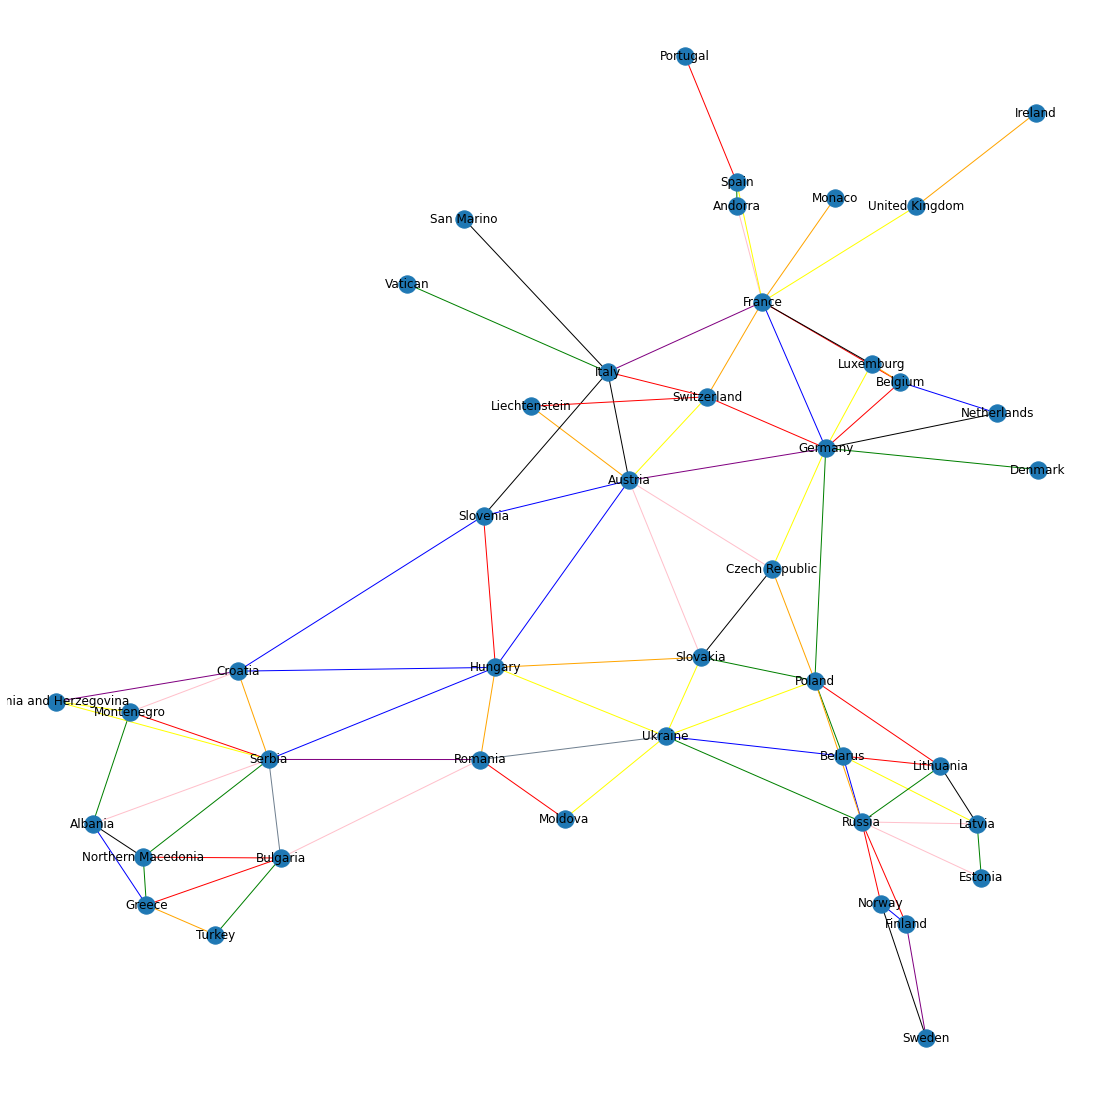

Minimum number of colors for edge coloring is 9

{'France': 0, 'Germany': 1, 'Serbia': 0, 'Austria': 0, 'Russia': 0, 'Hungary': 1, 'Poland': 2, 'Ukraine': 3, 'Italy': 1, 'Slovakia': 4, 'Switzerland': 2, 'Belarus': 1, 'Croatia': 2, 'Bulgaria': 1, 'Romania': 2, 'Albania': 1, 'Greece': 0, 'Montenegro': 3, 'Northern Macedonia': 2, 'Czech Republic': 3, 'Slovenia': 3, 'Latvia': 2, 'Lithuania': 3, 'Belgium': 2, 'Spain': 1, 'Luxemburg': 3, 'Bosnia and Herzegovina': 1, 'Finland': 1, 'Norway': 2, 'Andorra': 2, 'Liechtenstein': 1, 'Netherlands': 0, 'Turkey': 2, 'Estonia': 1, 'Sweden': 0, 'United Kingdom': 1, 'Moldova': 0, 'Denmark': 0, 'Monaco': 1, 'Ireland': 0, 'San Marino': 0, 'Vatican': 0, 'Portugal': 0}


In [8]:
colors = nx.greedy_color(nx.line_graph(G))
color_map = []

for edge in G.edges:
    if (edge in colors):
        if colors[(edge)]==0:
            color_map.append('red')
        elif colors[edge]==1: 
            color_map.append('green')
        elif colors[edge]==2: 
            color_map.append('blue')
        elif colors[edge]==3: 
            color_map.append('black')
        elif colors[edge]==4: 
            color_map.append('yellow')
        elif colors[edge]==5:
            color_map.append('orange')
        elif colors[edge]==6:
            color_map.append("pink")
        elif colors[edge]==7:
            color_map.append("purple")
        elif colors[edge]==8:
            color_map.append("slategrey")
        

plt.figure(3,figsize=(15,15))
pos=nx.spring_layout(G)
nx.draw(G,pos = pos,edge_color = color_map, with_labels = True)
plt.show()

print("Minimum number of colors for edge coloring is", max(nx.greedy_color(nx.line_graph(G)).values())+1)
print()
print(nx.greedy_color(G))

## 1-e Task
##### Task description: Find the maximum clique 𝑄 ⊆ 𝑉 of G.
##### Definitions:
A clique of a graph G is an induced subgraph of G that is complete.
![](https://i.pinimg.com/originals/1c/26/fb/1c26fbf728599191de9defc63e9ac2a9.gif)

In [21]:
from networkx.algorithms import approximation
cliq =  approximation.max_clique(G)

B = nx.Graph()
for node in cliq:
    B.add_node(node)
    
for first_edge in cliq:
    for second_edge in cliq:
        if (first_edge!=second_edge):
            B.add_edge(first_edge,second_edge)

net2 = Network("500px", "500px",notebook = True)
net2.from_nx(B)
net2.show("cliq.html")

## 1-f Task
##### Task description: Find the maximum stable set 𝑆 ⊆ 𝑉 of G.
##### Definitions: 
A maximum stable set is a stable set of largest possible size for a given graph. A stable set is a set of vertices in a graph, no two of which are adjacent. It’s obvious that for maximum stable set in priority we should choose vertices with a small degree and not vertices with a big degree.

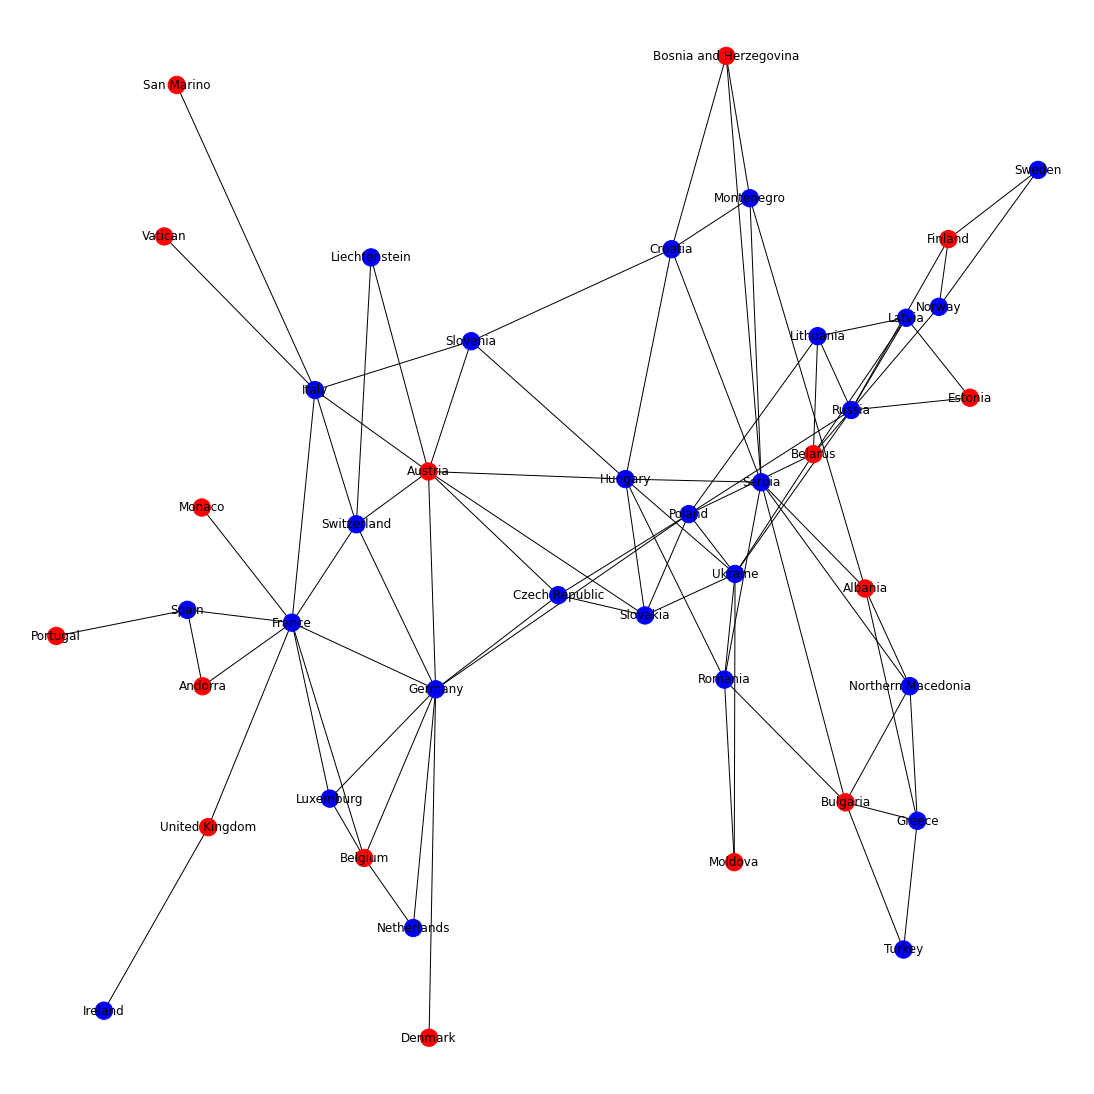

In [10]:
from networkx.algorithms import approximation

stable_set = approximation.maximum_independent_set(G)
color_node = []
for node in G:
    if node in stable_set: 
        color_node.append("red")
    else:
        color_node.append("blue")

plt.figure(3,figsize=(15,15))
pos=nx.spring_layout(G)
nx.draw(G,pos = pos,node_color = color_node, with_labels = True)
plt.show()

## 1-g Task
##### Task description: Find the maximum matching 𝑀 ⊆ 𝐸 of G.
##### Definitions: 
In the mathematical discipline of graph theory, a matching or independent edge set in an undirected graph is a set of edges without common vertices. 
In Networkx sources algorithm for finding max_mathcing called like "Efficient Algorithms for Finding Maximum Matching in Graphs".

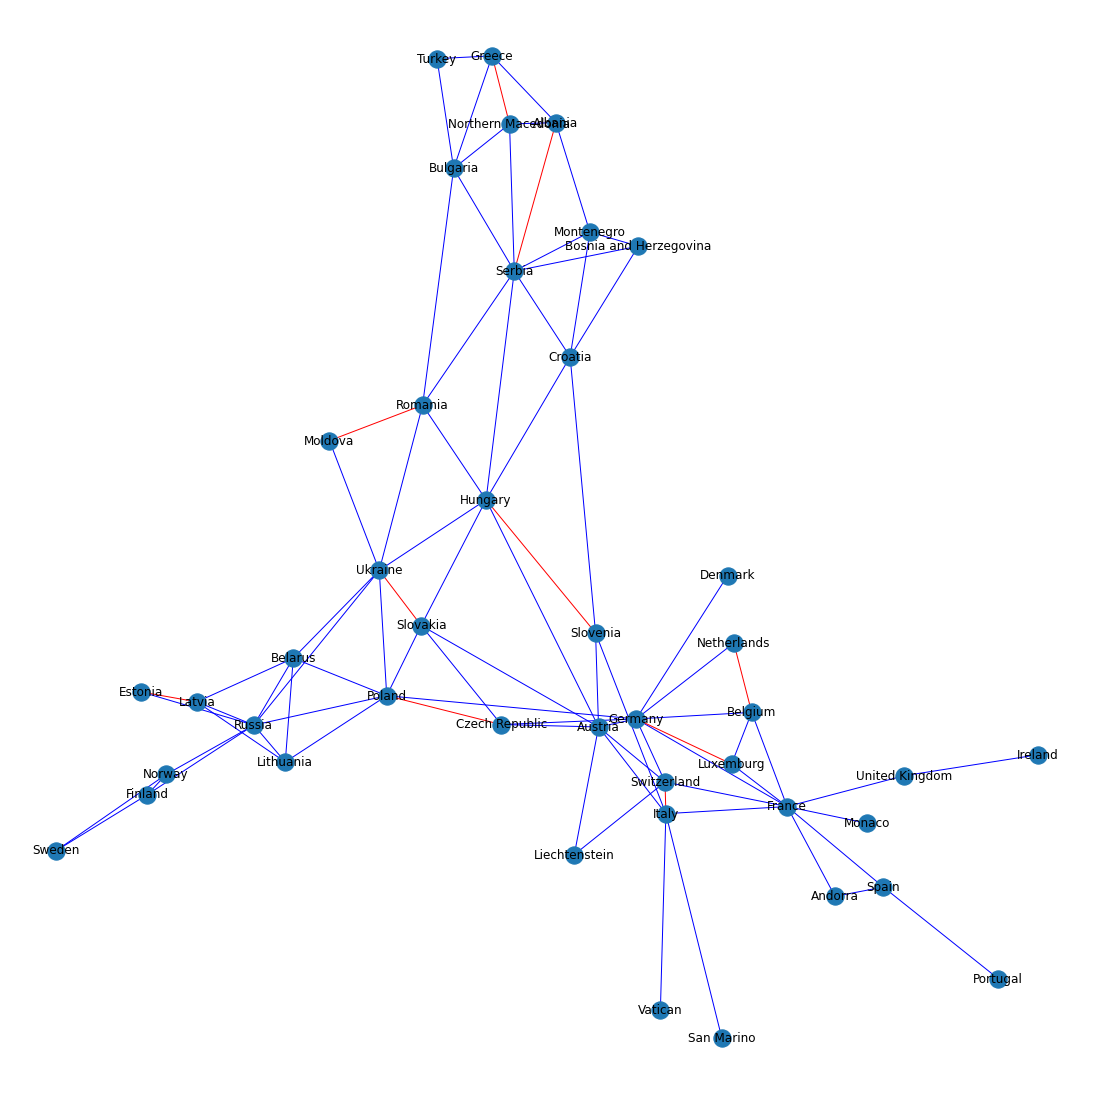

In [11]:
namings = {}
B = nx.Graph()
cnt= 0 
for edge in adjacency_list:
    if (edge.first_vert in namings)==0:
      #  print(first_vert,"\n")
        namings.update({edge.first_vert:cnt})
        cnt+=1
    elif (edge.second_vert in namings)==0:
        namings.update({edge.second_vert:cnt})
        cnt+=1
        
new_kost = []

for first_node, second_node,weight in kost:
    new_kost.append([first_node,second_node,{"weight":int(weight["weight"])}])

B.add_edges_from(new_kost)

max_match = nx.algorithms.matching.max_weight_matching(B,False,weight= "weight")
color_edge = []

for edge in G.edges:
    if (edge in max_match):
        color_edge.append("red")
    else:
        color_edge.append("blue")
        
        

plt.figure(3,figsize=(15,15))
pos=nx.spring_layout(B)
nx.draw(B,pos = pos,edge_color = color_edge, with_labels = True)
plt.show()


## 1-h Task
##### Task description: Find the minimum vertex cover 𝑅 ⊆ 𝑉 of G.
##### Definitions: 
A vertex cover is a subset of nodes such that each edge in the graph is incident to at least one node in the subset. In Networkx is called the local-ratio algorithm for computing an approximate vertex cover. The algorithm greedily reduces the costs over edges, iteratively building a cover.

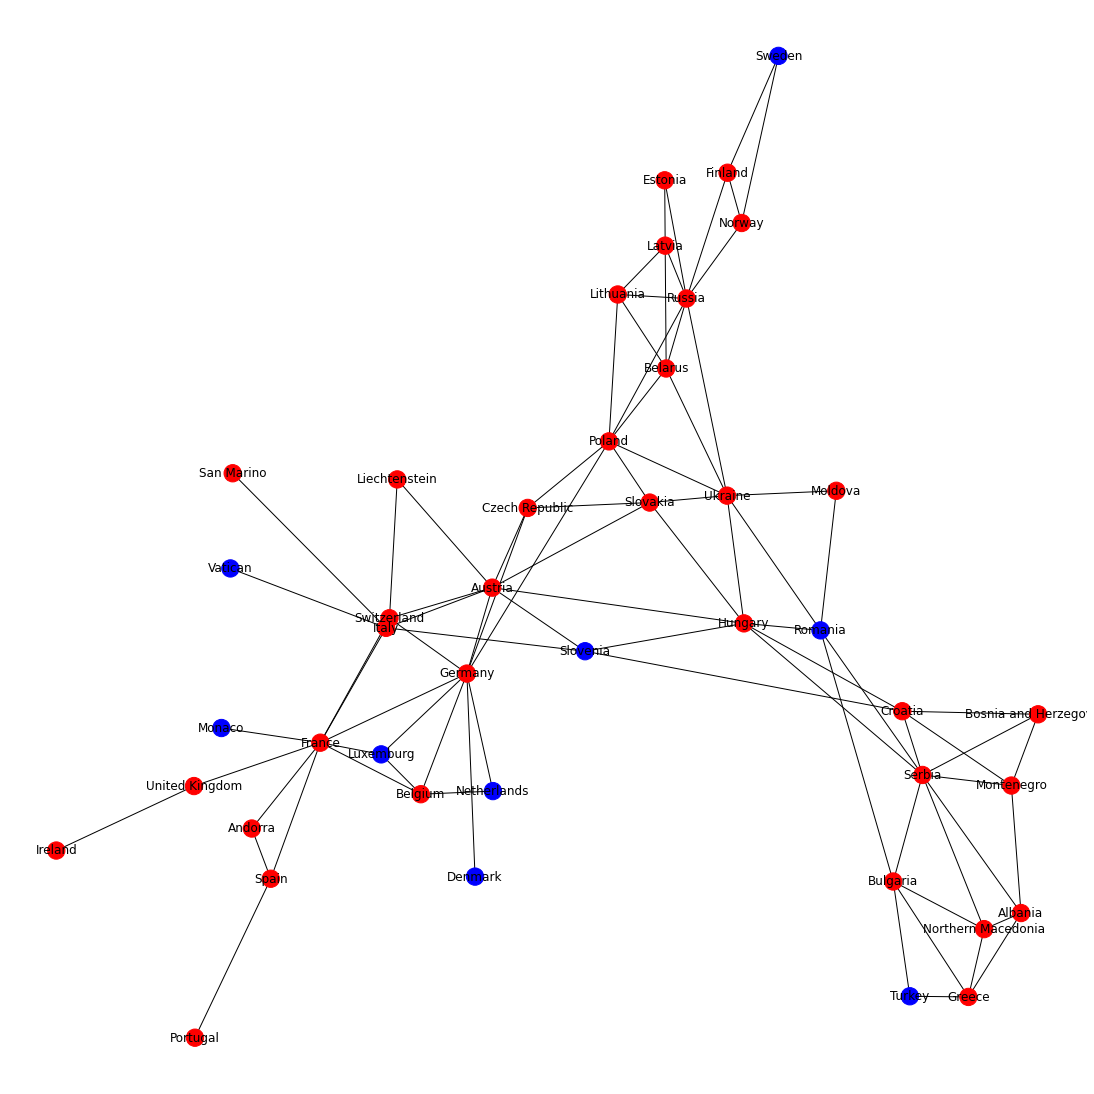

In [12]:
min_vertex_cover = nx.algorithms.approximation.vertex_cover.min_weighted_vertex_cover(B,weight= "weight")
vertex_cover = []
for vert in B:
    if vert in min_vertex_cover: 
        vertex_cover.append("red")
    else:
        vertex_cover.append("blue")

plt.figure(3,figsize=(15,15))
pos=nx.spring_layout(B)
nx.draw(B,pos = pos,node_color = vertex_cover, with_labels = True)
plt.show()
#min_vertex_cover

## 1-i Task
##### Task description: Find the minimum edge cover 𝐹 ⊆ 𝐸 of G.
##### Definitions: 
In graph theory, an edge cover of a graph is a set of edges such that every vertex of the graph is incident to at least one edge of the set. Logically, minimum edge cover is the edge cover of the smallest size. 

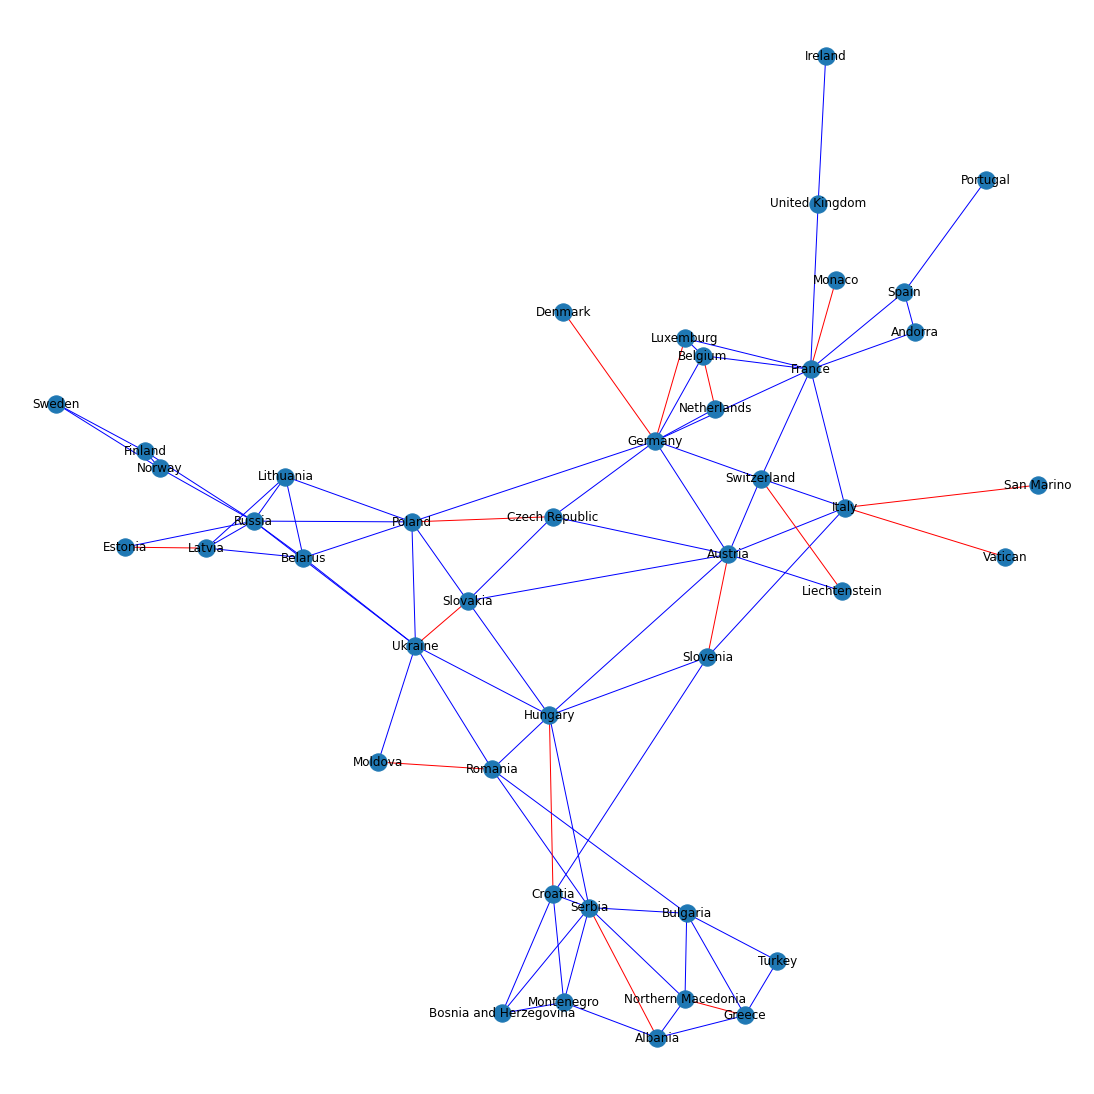

In [13]:
min_edge = nx.algorithms.covering.min_edge_cover(B)
min_color_edge = []

for edge in G.edges:
    if (edge in min_edge):
        min_color_edge.append("red")
    else:
        min_color_edge.append("blue")
        
        

plt.figure(3,figsize=(15,15))
pos=nx.spring_layout(B)
nx.draw(B,pos = pos,edge_color = min_color_edge, with_labels = True)
plt.show()

## 1-j Task
##### Task description: Find the shortest closed path (circuit) 𝑊 that visits every vertex of G.
##### Definitions: 
In graph theory, an edge cover of a graph is a set of edges such that every vertex of the graph is incident to at least one edge of the set. Logically, minimum edge cover is the edge cover of the smallest size. 

##### Comment:
For this task networkx doesn't work so well, so i did this by my hands

The shortest closed path (circuit) 𝑈 that visits every edge of G is:

Ireland, United Kingdom, France, Luxemburg, Belgium, Netherlands, Germany, Denmark, Germany, Switzerland, Liechtenstein, Austria, Czech Republic, Slovakia, Poland, Russia, Finland, Sweden, Norway, Russia, Estonia, Latvia, Lithuania, Belarus, Ukraine, Moldova, Romania, Bulgaria, Turkey, Greece, Albania, Northern Makedonia, Serbia, Montenegro, Bosnia and Herzegovina, Croatia, Hungary, Slovenia, Italy, San Marino, Italy, Vatican, Italy, France, Andorra, Spain, Portugal, Spain, France, Monaco, France, United Kingdom, Ireland

![](https://github.com/vaskers5/D_M_homework_Graphs/blob/main/pictures/circuit.jpg?raw=true)

## 1-k Task
##### Task description: Find the shortest closed path (circuit) 𝑈 that visits every edge of G. 

In [14]:
path = nx.algorithms.euler.eulerize(B)
print(list(nx.algorithms.euler.eulerian_path(path)))

[('Albania', 'Serbia'), ('Serbia', 'Romania'), ('Romania', 'Bulgaria'), ('Bulgaria', 'Romania'), ('Romania', 'Moldova'), ('Moldova', 'Ukraine'), ('Ukraine', 'Russia'), ('Russia', 'Norway'), ('Norway', 'Sweden'), ('Sweden', 'Finland'), ('Finland', 'Norway'), ('Norway', 'Finland'), ('Finland', 'Russia'), ('Russia', 'Poland'), ('Poland', 'Ukraine'), ('Ukraine', 'Belarus'), ('Belarus', 'Poland'), ('Poland', 'Lithuania'), ('Lithuania', 'Russia'), ('Russia', 'Latvia'), ('Latvia', 'Lithuania'), ('Lithuania', 'Belarus'), ('Belarus', 'Russia'), ('Russia', 'Estonia'), ('Estonia', 'Latvia'), ('Latvia', 'Belarus'), ('Belarus', 'Ukraine'), ('Ukraine', 'Romania'), ('Romania', 'Hungary'), ('Hungary', 'Ukraine'), ('Ukraine', 'Slovakia'), ('Slovakia', 'Hungary'), ('Hungary', 'Slovakia'), ('Slovakia', 'Poland'), ('Poland', 'Germany'), ('Germany', 'Switzerland'), ('Switzerland', 'Italy'), ('Italy', 'Vatican'), ('Vatican', 'Italy'), ('Italy', 'San Marino'), ('San Marino', 'Italy'), ('Italy', 'Slovenia'), 

## 1-l Task
##### Task description: Find all 2-vertex-connected components (blocks) and draw a block-cut tree of G*.
##### Definitions: 
A subgraph is said to be 2–vertex connected if it has more than 2 vertices and remains connected on the removal of any vertices. Any connected graph decomposes into a tree of biconnected components called the block-cut tree of the graph. The blocks are attached to each other at shared vertices called cut vertices.

In [15]:
blocks = nx.algorithms.approximation.kcomponents.k_components(B)
blocks = blocks[2]
for i in range(len(blocks)):
    if(len(blocks[i])!=0):
        print(i,"block_are: ")
        for comp in blocks[i]:
            print(comp,end = " ")
        print()
        print()

0 block_are: 
France Andorra Spain 

1 block_are: 
Norway Sweden Finland Russia 

2 block_are: 
Switzerland Russia Montenegro Lithuania Greece Moldova Liechtenstein France Hungary Netherlands Belarus Czech Republic Belgium Romania Germany Poland Northern Macedonia Croatia Turkey Latvia Bulgaria Bosnia and Herzegovina Luxemburg Slovakia Slovenia Ukraine Estonia Albania Serbia Italy Austria 



![](https://github.com/vaskers5/D_M_homework_Graphs/blob/main/pictures/bruh.png?raw=true)

## 1-m Task
##### Task description: Find all 2-edge-connected components of G*.
##### Definitions: 
In graph theory, a connected graph is k-edge-connected if it remains connected whenever fewer than k edges are removed.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/2-edge_connected_graph.svg/330px-2-edge_connected_graph.svg.png)
![](https://media1.giphy.com/media/7JypDuFlNM7FrvvRQ2/200w.webp)

In [16]:
block_edge = list(nx.algorithms.connectivity.edge_kcomponents.k_edge_components(G,2))
for i in range(len(block_edge)):
    if(len(block_edge[i])!=0):
        print(i,"block_are: ")
        for comp in block_edge[i]:
            print(comp,end = " ")
        print()
        print()

0 block_are: 
Norway Russia Lithuania Greece France Netherlands Belarus Romania Czech Republic Belgium Northern Macedonia Bulgaria Bosnia and Herzegovina Slovakia Slovenia Ukraine Estonia Germany Italy Austria Switzerland Montenegro Moldova Liechtenstein Hungary Andorra Poland Croatia Turkey Latvia Spain Luxemburg Sweden Albania Serbia Finland 

1 block_are: 
Denmark 

2 block_are: 
Monaco 

3 block_are: 
United Kingdom 

4 block_are: 
Ireland 

5 block_are: 
San Marino 

6 block_are: 
Vatican 

7 block_are: 
Portugal 



## 1-n Task
##### Task description: Construct an SPQR tree of the largest biconnected component of G.
##### Definitions: 
In graph theory the triconnected components of a biconnected graph are a system of smaller graphs that describe all of the 2-vertex cuts in the graph. An SPQR tree is a tree data structure  to represent the triconnected components of a graph.

##### Comment:
for constructing SPQR tree I used sagemath, here is my code: https://clck.ru/UDe9U



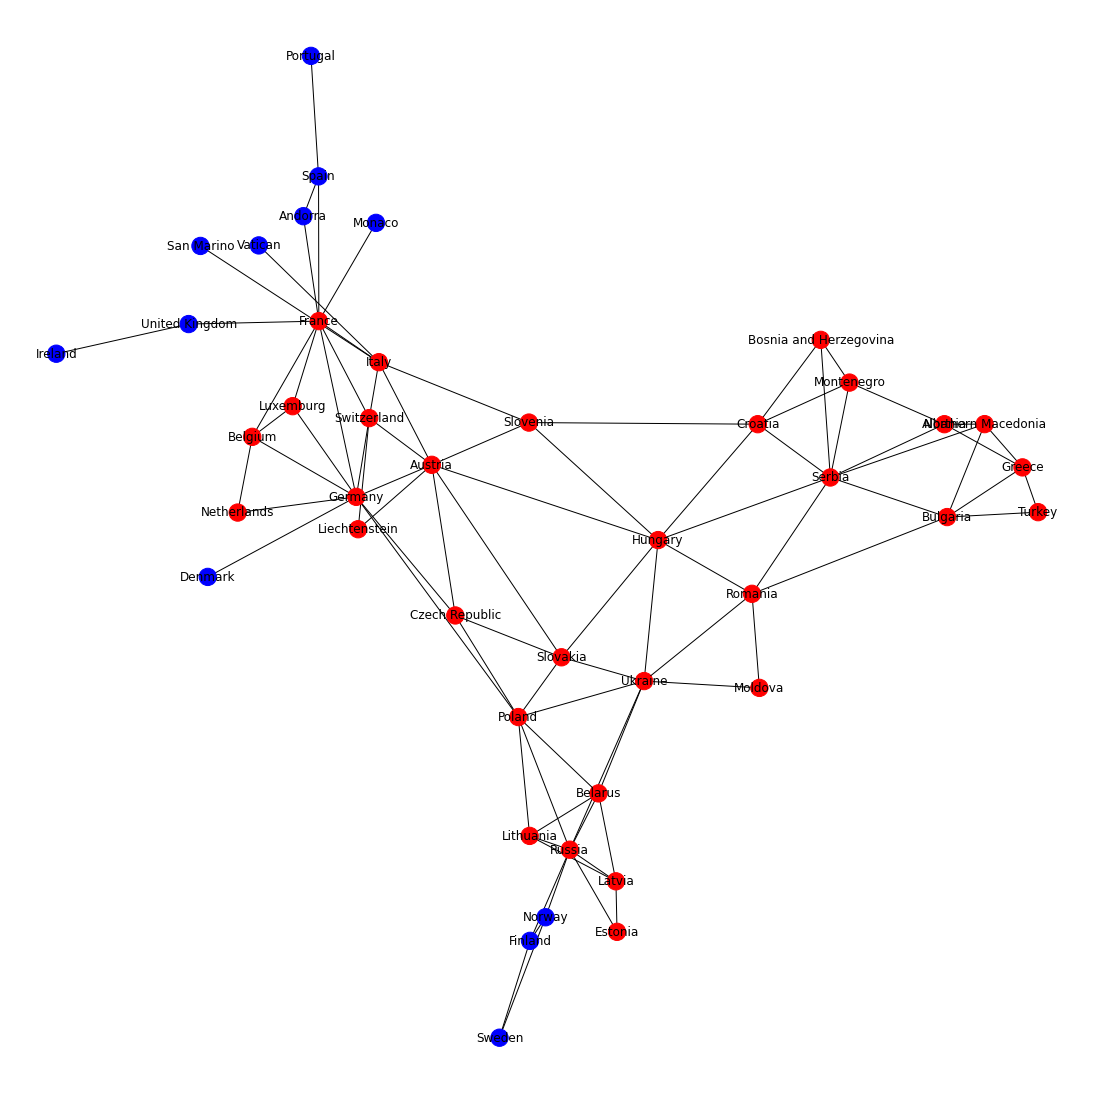

In [17]:
import sage

need_to_draw_tree = nx.algorithms.components.biconnected_components(B)
max_len = 0
max_elem = {}
for elem in need_to_draw_tree:
    if len(elem)>max_len:
        max_len = len(elem)
        max_elem = elem

vertex_color = []
for vert in B:
    if vert in max_elem: 
        vertex_color.append("red")
    else:
        vertex_color.append("blue")

plt.figure(3,figsize=(15,15))
pos=nx.spring_layout(B)
nx.draw(B,pos = pos,node_color = vertex_color, with_labels = True)
plt.show()

![](https://github.com/vaskers5/D_M_homework_Graphs/blob/main/pictures/sqpr_tree.png?raw=true)

## 1-o Task
##### Task description: 
Add the weight function 𝑤: 𝐸 → R denoting the distance between capitals. Find the minimum (w.r.t. the total weight of edges) spanning tree 𝑇 for the maximum connected component of the weighted Europe graph G* 𝑤 = (𝑉, 𝐸, 𝑤).
##### Definitions: 
A spanning tree is a subset of Graph G, which has all the vertices covered with minimum possible number of edges. Minimum weight spanning tree is a subset of the edges of a connected, edge-weighted undirected graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight.

#### Comment:
Я пытался сделать это адекватно, но у меня не вышло, поэтому держи отображение отдельно с весами и отдельно с вершинами(второе можно потыкать)
![](https://media1.tenor.com/images/84eaaffcd934825cfb8a5b15e0b3f217/tenor.gif?itemid=18498968)

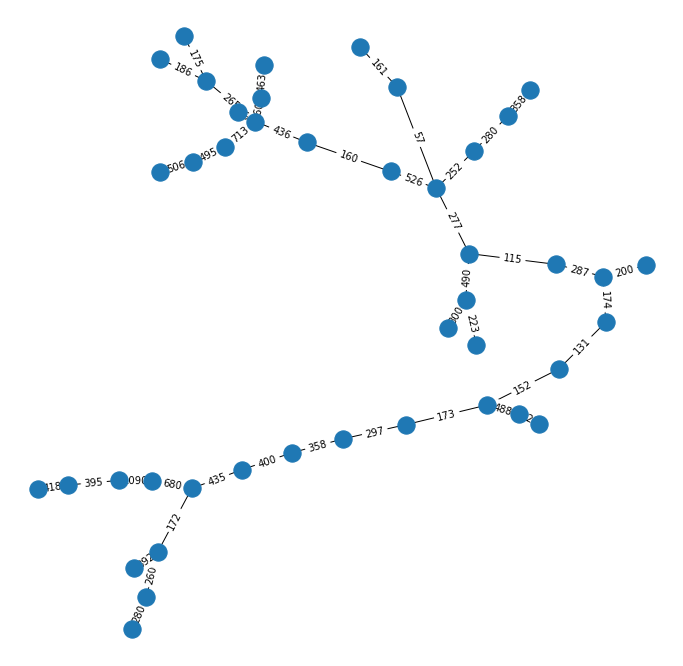

In [20]:

namings = {}
C = nx.Graph()
        
new_kost3 = []

for first_node, second_node,weight in kost:
    new_kost3.append([first_node,second_node,int(weight["weight"])])

C.add_weighted_edges_from(new_kost3)

min_tree = nx.algorithms.tree.mst.minimum_spanning_tree(C)
net3 = Network("500px", "500px",notebook = True)
pos=nx.spring_layout(min_tree) 
labels1 = nx.get_edge_attributes(min_tree,'weight')
labels = nx.get_node_attributes(min_tree,"node")
plt.figure(3,figsize=(12,12)) 
nx.draw_networkx_edge_labels(min_tree,pos,edge_labels=labels)
nx.draw_networkx_edge_labels(min_tree,pos,edge_labels=labels1 )
nx.draw(min_tree,pos)
plt.show()
net3.from_nx(min_tree)
            
net3.show("tree.html")

## 1-p Task
##### Task description: Find centroid(𝑇) (w.r.t. the edge weight function 𝑤)

##### Definitions: 
The centroid of a graph is a structure composed of nodes closest from all others. This suggests the presence of center of mass average of all edges, weighted by the local density or specific weight.


#### Algo:
For each vertex I calculate the weights of its branches, for every country I choose the biggest and then I find a vertex that has a branch with a minimal weight. That vertex is the centroid.

Weights of branches for some countries:

890 218 8515 5475 - AUT
7971 6810 713 - SVN
7856 7638 - HRV
7925 7369 200 - BIH

#### Centroid is Croatia

![](https://github.com/vaskers5/D_M_homework_Graphs/blob/main/pictures/minimal_spanning_tree.png?raw=true)

## 1-q Task
##### Task description: Construct the Prufer code for 𝑇.

##### Definitions: 
In combinatorial mathematics, the Prüfer sequence (also Prüfer code or Prüfer numbers) of a labeled tree is a unique sequence associated with the tree.

![](https://media2.giphy.com/media/BzyTuYCmvSORqs1ABM/200w.webp?cid=ecf05e470on06iz88psv6tgc4p5m3hsb0rvbnhpkmffn8g6g&rid=200w.webp&ct=g)

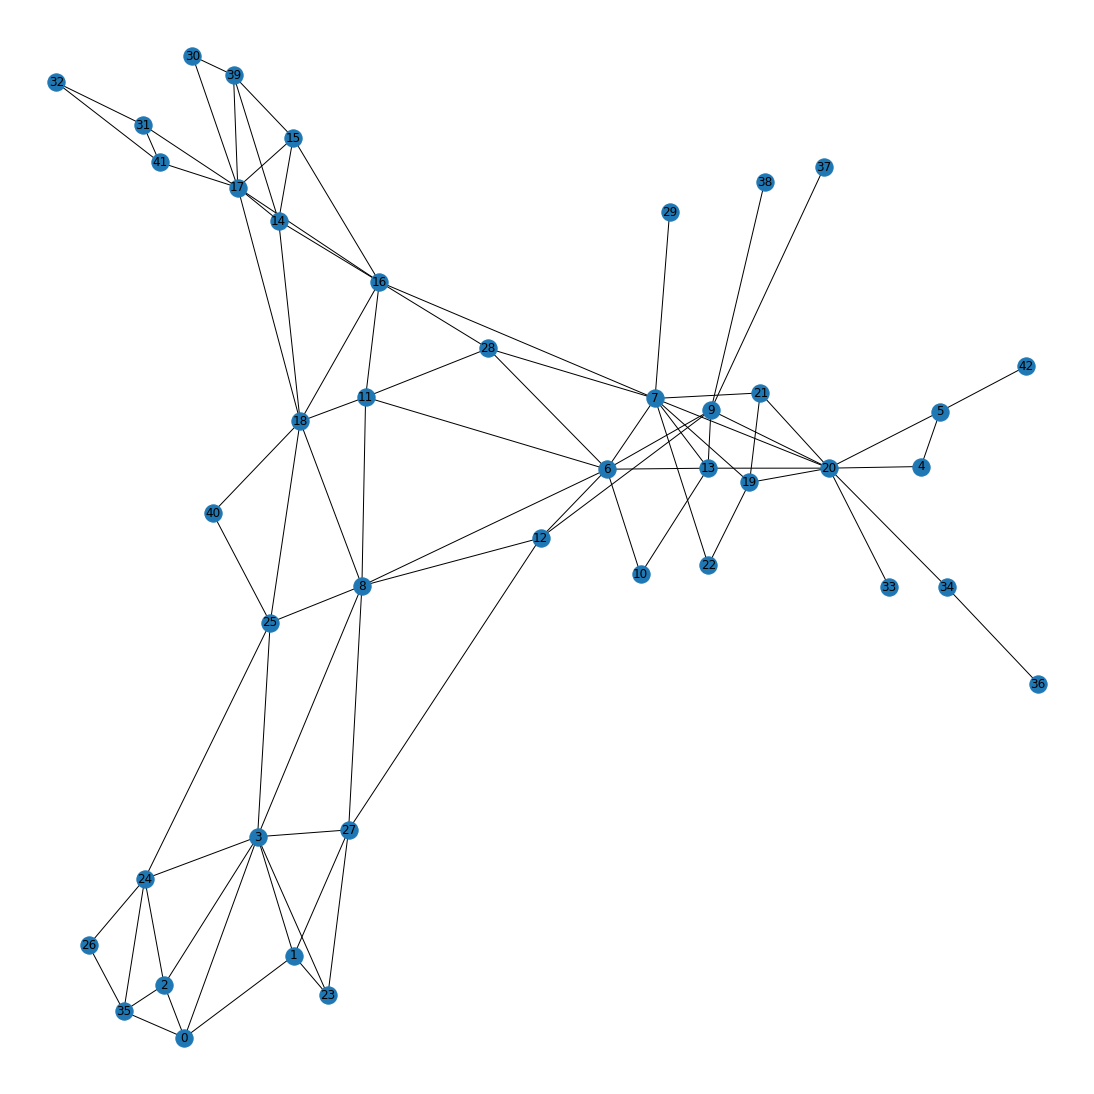

[23, 11, 6, 15, 19, 19, 20, 35, 7, 28, 6, 39, 20, 2, 34, 20, 9, 9, 12, 15, 14, 32, 31, 17, 14, 18, 40, 25, 24, 2, 0, 1, 23, 27, 12, 6, 10, 13, 20, 4, 5]


In [19]:
cnt= 0 
for edge in adjacency_list:
    if (edge.first_vert in namings)==0:
      #  print(first_vert,"\n")
        namings.update({edge.first_vert:cnt})
        cnt+=1
    elif (edge.second_vert in namings)==0:
        namings.update({edge.second_vert:cnt})
        cnt+=1

new_kost4 = []

for first_node, second_node,weight in kost:
    new_kost4.append([namings[first_node],namings[second_node],{"weight":int(weight["weight"])}])

H = nx.Graph()
H.add_edges_from(new_kost4)
H.edges
plt.figure(3,figsize=(15,15))
poss = nx.spring_layout(H)
nx.draw(H,pos = poss, with_labels = True)
plt.show()
tree =  nx.algorithms.tree.mst.minimum_spanning_tree(H)
sequence = nx.to_prufer_sequence(tree)
print(sequence)

# Second Task
## Task description: Prove rigorously the following theorems:
![](https://media3.giphy.com/media/1Y7ChRtbWnYONjDidg/giphy.gif?cid=ecf05e47gppgsm8m7vuj448bmt41pj0w66g1qkxwrtpjl147&rid=giphy.gif&ct=g)

### Description:
Theorem 1. (Triangle Inequality) For any connected graph 𝐺 = ⟨𝑉, 𝐸⟩: ∀𝑥, 𝑦, 𝑧 ∈ 𝑉: dist(𝑥, 𝑦) + dist(𝑦, 𝑧) ≥ dist(𝑥, 𝑧)

We have two situation:
1. If there is an edge between vertices x and z, then dist(x, z) = 1, it follows that at any dist(x, z) and dist(y, z) values, the condition is work
2. If there isn't an edge between vertices x and z, then we have two options:
If dist(x, z)-path is a way passing through y, then dist(x, y) + dist(y, z) = dist(x, z).
If dist(x, z)-path is not passing through y, then we have another path as dist(x, z). And the path from x to y and from y to z will be greater than dist(x, z).

In total, dist(x, y) + dist(y, z) ≥ dist(x, z)

### Description:
Theorem 2. For any connected graph 𝐺: rad(𝐺) ≤ diam(𝐺) ≤ 2rad(𝐺).

Because the radius is the minimum eccentricity of any vertex and the diameter is the maximum, rad(G) <= diam(G).

Let u and v be vertices of G such that dist(u, v) = diam(G). Let w be a central vertex so that ecc(w) = rad(G). This means that no vertex is at a distance greater than rad(G) from w. In particular dist(u,w) and dist(v, w) are both <= rad(G). Therefore, dist(u,w) + dist(v, w) ≤ 2rad(G). By the triangle inequality, dist(u, v) ≤ dist(u,w) + dist(v, w). This establishes that rad(G) ≤ diam(G) ≤ 2 rad(G).

### Description:
Theorem 3. A connected graph 𝐺 = ⟨𝑉, 𝐸⟩ is a tree (i.e. acyclic graph) iff |𝐸| = |𝑉| − 1.

### Proof:

Let’s proof that every tree with n vertices has n−1 edges. If n = 1, then there are no edges and we have a tree. If n > 1, clearly, there must be at least one edge (or else the graph is not connected). By removing an edge, the tree splits into two smaller connected graphs, each of which is a tree. Let them have n1 and n2 vertices, where n1+n2=n. Then the induction hypothesis applies to both, hence they have n1−1 and n2−1 edges, hence the original graph has (n1−1)+(n2−1)+1=n−1 edges. 

Then it follows that every connected graph on n vertices that is not a tree has at least n edges.

Starting from a connected non-tree, we can repeatedly remove an edge from a cycle without destroying connectivity. Sooner or later, after removing k ≥ 1 edges, we will arrive at a tree. Hence we started with n+k−1≥n edges. Consequently, a connected graph G = (V, E) is a tree, iff |E| = |V| − 1. 



### Description:
Theorem 4. Given a connected graph 𝐺 with 𝑛 vertices, if 𝛿(𝐺) ≥ ⌊𝑛/2⌋, then 𝜆(𝐺) = 𝛿(𝐺).

### Proof:

If we try to remove the number of edges, that is bigger than 𝛿(𝐺), the vertex won't have enough edges to remove. 
And if we try to remove the number of edges, that is less than 𝛿(𝐺), then the value of 𝜆(𝐺) will be changed. Following from these two facts, 𝛿(𝐺) = 𝜆(𝐺).

### Description:

Theorem 5. Every block of a block graph is a clique.

### Proof:

By a definition of a block graph from Wikipedia, a graph is a block graph if every block (maximal 2-connected component) is a clique. https://en.wikipedia.org/wiki/Block_graph

## Thanks for reading my work:

![](https://media3.giphy.com/media/13CoXDiaCcCoyk/200.webp?cid=ecf05e470on06iz88psv6tgc4p5m3hsb0rvbnhpkmffn8g6g&rid=200.webp&ct=g)